<a href="https://colab.research.google.com/github/zakomayo/Customer-Segmentation/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Segmentation

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# EDA

In [2]:
#load data
df = pd.read_csv("/content/Mall_Customers.xls")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are 5 variables and 200 observations.

In [8]:
df.shape

(200, 5)

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



Some observations:
*   Minimum age is 18. Maximum age is 70. Probably only adults can be members.
*   Minumum annual income is 13k.  max income is 137k.



In [19]:
df.describe(include='O') # describe object datatypes

,Gender
count,200
unique,2
top,Female
freq,112


More females than malesa are members.

In [16]:
list(df.Gender.unique())

['Male', 'Female']

In [17]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values.

In [18]:
df[df.duplicated(keep='first')]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


No duplicated values.

# Data Viz

Univariate Analysis

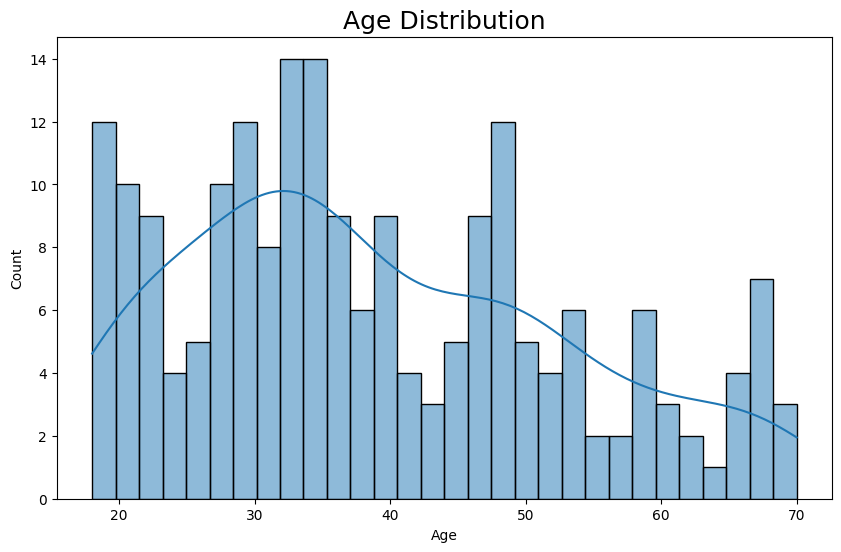

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(df.Age, bins = 30, kde = True)
plt.title('Age Distribution',size=18)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

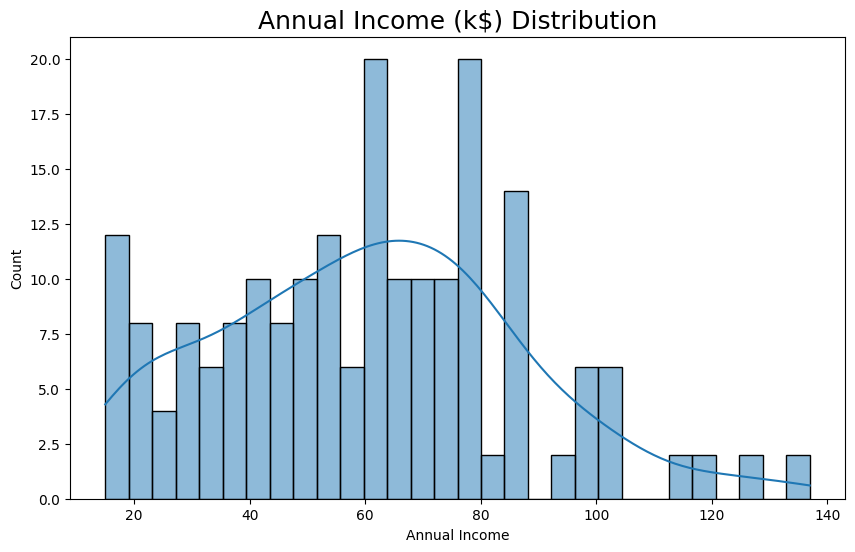

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(df['Annual Income (k$)'], bins = 30, kde = True)
plt.title('Annual Income (k$) Distribution',size=18)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

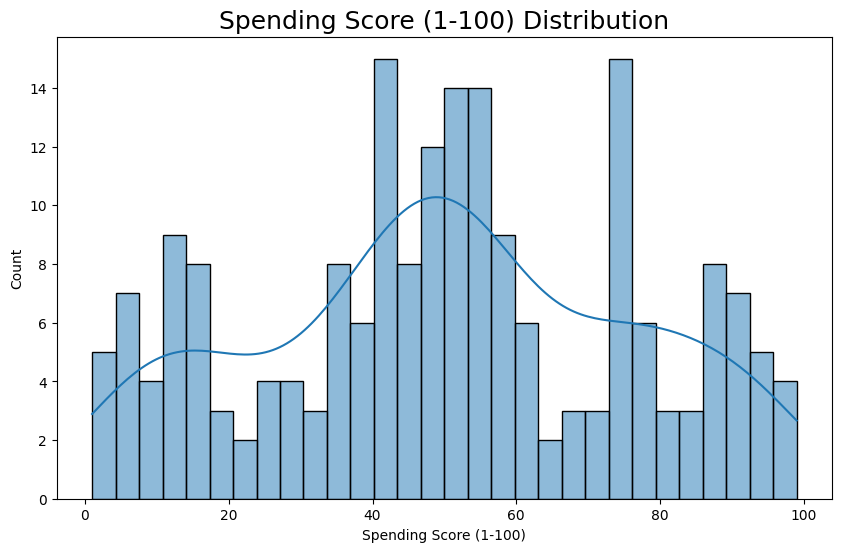

In [47]:
plt.figure(figsize=(10,6))
sns.histplot(df['Spending Score (1-100)'], bins = 30, kde = True)
plt.title('Spending Score (1-100) Distribution',size=18)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()



1.   Age and Annual income are right-skewed distribution.
2.   Spending score is symmetric distribution.

